In [2]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import graphviz


In [3]:
wine=load_wine()
wine
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [7]:
wine.data.shape

(178, 13)

In [4]:
import pandas as pd
pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [24]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [6]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(wine.data,wine.target,test_size=0.3)

In [71]:
# entropy,gini
from sklearn.model_selection import cross_val_score
clf=tree.DecisionTreeClassifier(criterion="gini" 
#                                ,min_samples_leaf=10
                               ,min_samples_split=10
                               ,max_depth=4
                               ,max_features=5
                               ,min_impurity_decrease=0.02)
clf=clf.fit(Xtrain,Ytrain)
result1=clf.score(Xtest,Ytest)
result1


0.9074074074074074

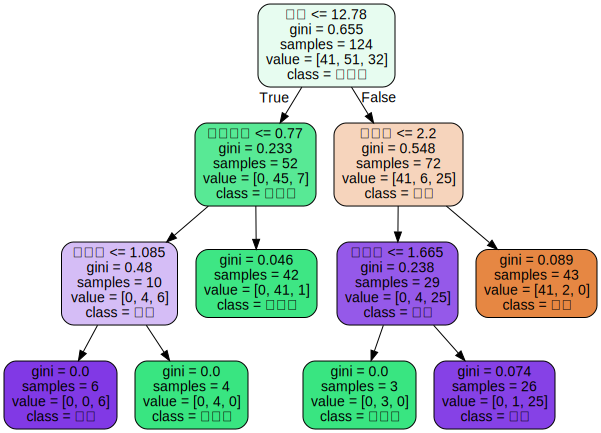

In [76]:
import graphviz
feature_name=['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','颜色强度','色调','稀释葡萄酒']
dot_data=tree.export_graphviz(clf
                             ,feature_names=feature_name
                             ,class_names=["清酒","梅子酒","花酒"]
                             ,filled=True
                             ,rounded=True)
graph=graphviz.Source(dot_data)
graph

In [36]:
[*zip(feature_name,clf.feature_importances_)]

[('酒精', 0.0),
 ('苹果酸', 0.0),
 ('灰', 0.0),
 ('灰的碱性', 0.01044018476757876),
 ('镁', 0.0),
 ('总酚', 0.0),
 ('类黄酮', 0.45517599182077173),
 ('非黄烷类酚类', 0.0),
 ('花青素', 0.0),
 ('颜色强度', 0.2903979136503925),
 ('颜色强度', 0.04001400041784949),
 ('色调', 0.0),
 ('稀释葡萄酒', 0.20397190934340764)]

In [49]:
result2=clf.score(Xtrain,Ytrain)
result2

1.0

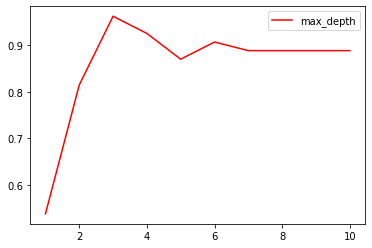

In [55]:
import matplotlib.pyplot as plt

test=[]
for i in range(10):
    clf=tree.DecisionTreeClassifier(max_depth=i+1
                                  ,criterion="entropy"
                                  ,random_state=30
                                  ,splitter="random")
    clf=clf.fit(Xtrain,Ytrain)
    score=clf.score(Xtest,Ytest)
    test.append(score)

plt.plot(range(1,11),test,color="red",label="max_depth")
plt.legend()
plt.show()

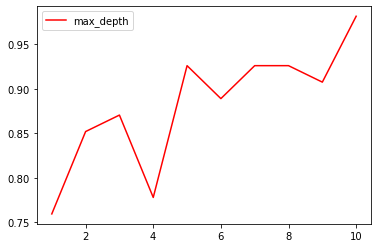

In [56]:
import matplotlib.pyplot as plt

test=[]
for i in range(10):
    clf=tree.DecisionTreeClassifier(max_features=i+1
                                  ,criterion="entropy"
                                  ,random_state=30
                                  ,splitter="random")
    clf=clf.fit(Xtrain,Ytrain)
    score=clf.score(Xtest,Ytest)
    test.append(score)

plt.plot(range(1,11),test,color="red",label="max_depth")
plt.legend()
plt.show()

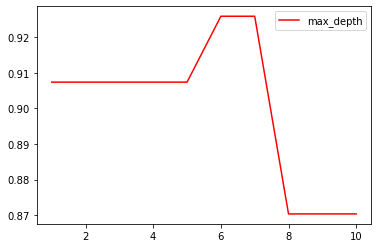

In [62]:
test=[]
for i in range(10,20):
    clf=tree.DecisionTreeClassifier(min_samples_leaf=i-1
                                  ,criterion="entropy"
                                  ,random_state=30
                                  ,splitter="random")
    clf=clf.fit(Xtrain,Ytrain)
    score=clf.score(Xtest,Ytest)
    test.append(score)

plt.plot(range(1,11),test,color="red",label="max_depth")
plt.legend()
plt.show()

In [63]:
clf.predict(Xtest)

array([0, 2, 2, 1, 1, 1, 1, 2, 0, 1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 2, 1, 1, 0, 1, 2, 1, 2, 2, 2, 0, 1, 0, 0, 2, 1, 0, 1, 0, 1, 2,
       1, 1, 1, 2, 0, 2, 2, 1, 1, 2])

In [64]:
clf.apply(Xtest)

array([8, 3, 4, 7, 5, 5, 5, 4, 8, 7, 3, 3, 3, 7, 7, 5, 8, 8, 5, 8, 8, 7,
       8, 3, 7, 5, 8, 5, 3, 7, 3, 3, 3, 8, 7, 8, 8, 3, 5, 8, 5, 8, 5, 3,
       7, 5, 7, 3, 8, 4, 3, 7, 5, 3], dtype=int64)